In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Используем MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost as xgb

In [2]:
# Настройка стиля графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Загрузка локальных данных
df = pd.read_csv('parkinsons.data')

# Удаление столбца 'name'
df = df.drop(['name'], axis=1)

print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print("Первые строки данных:")
print(df.head())
print(f"\nРазмерность данных: {df.shape}")

# Получение признаков и меток ()
print("\n=== ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ И МЕТОК ===")
features = df.loc[:, df.columns != 'status'].values[:, 1:]  # Все признаки кроме 'status'
labels = df.loc[:, 'status'].values                         # Целевая переменная

print(f"Форма признаков (features): {features.shape}")
print(f"Форма меток (labels): {labels.shape}")
print(f"Первые 5 строк признаков:\n{features[:5]}")
print(f"Первые 5 меток: {labels[:5]}")

# Нормализация признаков (MinMaxScaler от -1 до 1)
print("\n=== НОРМАЛИЗАЦИЯ ПРИЗНАКОВ ===")
scaler = MinMaxScaler((-1, 1))
x_normalized = scaler.fit_transform(features)

print(f"Форма нормализованных признаков: {x_normalized.shape}")
print("Первые 5 строк нормализованных признаков:")
print(x_normalized[:5])

=== ИНФОРМАЦИЯ О ДАННЫХ ===
Первые строки данных:
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR 

In [3]:
# Вывод статистики до и после нормализации
print("\n=== СТАТИСТИКА ДО НОРМАЛИЗАЦИИ ===")
features_df = pd.DataFrame(features)
print("Средние значения до нормализации:")
print(features_df.mean().head())
print("Минимальные значения до нормализации:")
print(features_df.min().head())
print("Максимальные значения до нормализации:")
print(features_df.max().head())

print("\n=== СТАТИСТИКА ПОСЛЕ НОРМАЛИЗАЦИИ ===")
normalized_df = pd.DataFrame(x_normalized)
print("Средние значения после нормализации:")
print(normalized_df.mean().head())
print("Минимальные значения после нормализации:")
print(normalized_df.min().head())
print("Максимальные значения после нормализации:")
print(normalized_df.max().head())


=== СТАТИСТИКА ДО НОРМАЛИЗАЦИИ ===
Средние значения до нормализации:
0    197.104918
1    116.324631
2      0.006220
3      0.000044
4      0.003306
dtype: float64
Минимальные значения до нормализации:
0    102.145000
1     65.476000
2      0.001680
3      0.000007
4      0.000680
dtype: float64
Максимальные значения до нормализации:
0    592.03000
1    239.17000
2      0.03316
3      0.00026
4      0.02144
dtype: float64

=== СТАТИСТИКА ПОСЛЕ НОРМАЛИЗАЦИИ ===
Средние значения после нормализации:
0   -0.612318
1   -0.414503
2   -0.711534
3   -0.707834
4   -0.746974
dtype: float64
Минимальные значения после нормализации:
0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
dtype: float64
Максимальные значения после нормализации:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [4]:


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    x_normalized, labels, test_size=0.2, random_state=42, stratify=labels
)


In [7]:

print(f"\n=== РАЗДЕЛЕНИЕ ДАННЫХ ===")
print(f"Размер обучающей выборки: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Размер тестовой выборки: X_test={X_test.shape}, y_test={y_test.shape}")

# Создание и обучение модели XGBoost
print("\n=== ОБУЧЕНИЕ МОДЕЛИ XGBOOST ===")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    min_child_weight=1,
    random_state=42
)

model.fit(X_train, y_train)
print("Модель обучена!")



=== РАЗДЕЛЕНИЕ ДАННЫХ ===
Размер обучающей выборки: X_train=(156, 21), y_train=(156,)
Размер тестовой выборки: X_test=(39, 21), y_test=(39,)

=== ОБУЧЕНИЕ МОДЕЛИ XGBOOST ===
Модель обучена!


In [8]:

# Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Точность
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== РЕЗУЛЬТАТЫ ===")
print(f"Точность модели: {round(accuracy, 4)}")

# Отчет классификации
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))




=== РЕЗУЛЬТАТЫ ===
Точность модели: 0.9231

Отчет классификации:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



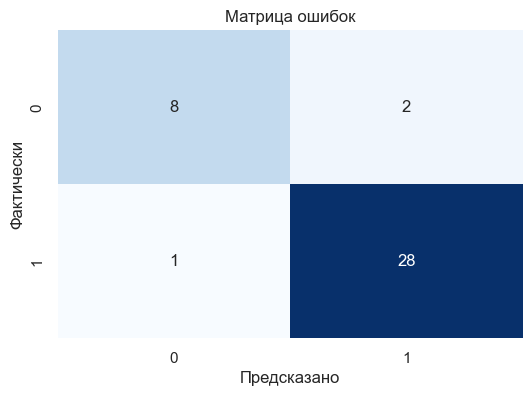

In [9]:
# Матрица ошибок
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.show()



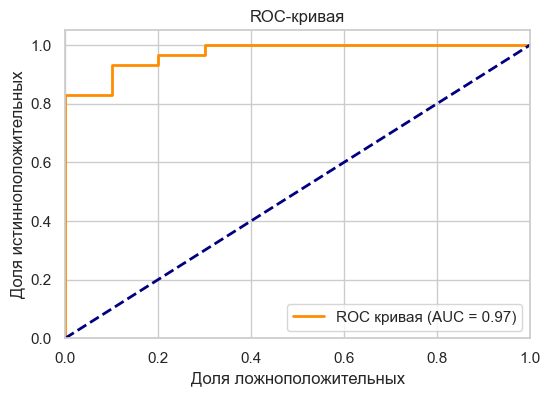

In [10]:
# ROC кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных')
plt.ylabel('Доля истинноположительных')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


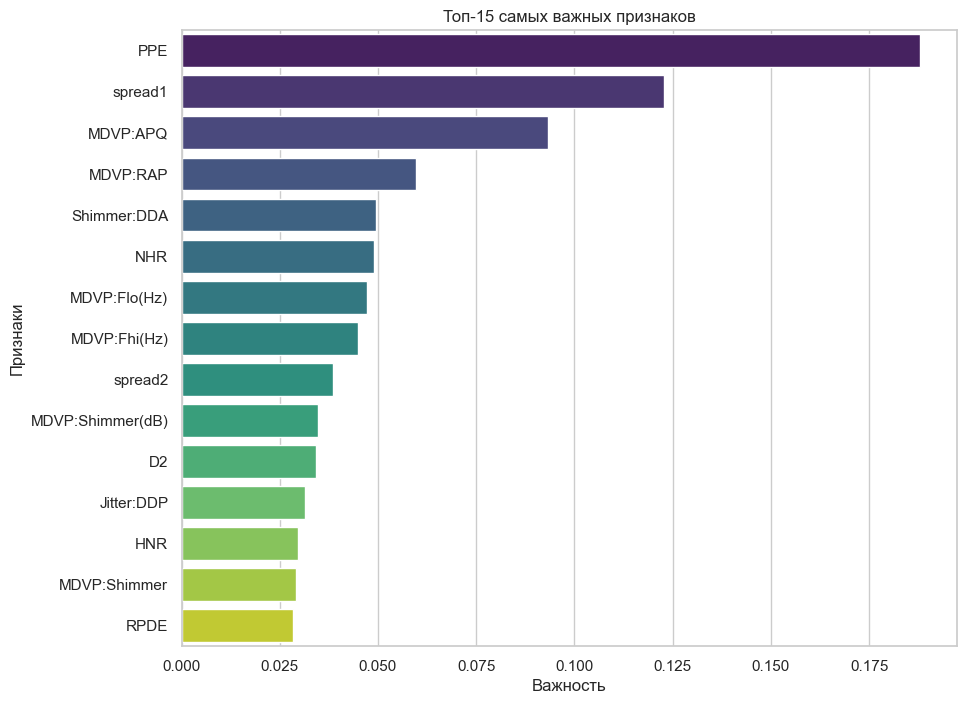

In [12]:

# Важность признаков
plt.figure(figsize=(10, 8))
importance = model.feature_importances_
feature_names = df.loc[:, df.columns != 'status'].columns[1:]  # Получаем имена признаков
feature_importance = pd.DataFrame({'Признак': feature_names, 'Важность': importance})
feature_importance = feature_importance.sort_values(by='Важность', ascending=False)

sns.barplot(data=feature_importance.head(15), x='Важность', y='Признак', hue='Признак', palette='viridis', legend=False)
plt.title('Топ-15 самых важных признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()